# Óscar Gómez Borzdynski
## Práctica 2
### Procesos Estocásticos

In [1]:
from random import uniform, gauss
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [3]:
%%html
<style>
    h1, h2, h3 {color: #3d6f91;}
    b, li, ul {color: #5D8AA8;}
</style>

### Ejercicio 1

<div style="color: #5D8AA8;">
En los apuntes hay el ejemplo del gambler’s ruin como cadena de Markov.  Hacer un gráfico del numero medio de jugadas que el jugador puede hacer antes de arruinarse en funcion del dinero inicial. En cada jugada se juega 1 Euro, y el juego es ecuo (el jugador tiene una probabilidad $\frac{1}{2}$ de ganar). Estimar media y varianza con 20 ejecuciones considerando un dinero inicial de $1, 2,\dots, 50$ Euros. Indicar media y varianza. ¿Como varian la media y la varianza cuando aumenta el dinero inicial?
</div>

Primero vamos a definir la cadena de markov para este problema concreto simplificando la codificación para que ejecute hasta que el jugador se arruine.

In [3]:
def run_gambler(initial_money, win_probability=0.5):
    money = initial_money
    games = 0
    while money > 0:
        if uniform(0,1) > win_probability:
            money += 1
        else: 
            money -= 1
        games += 1
    return games

In [4]:
max_money = 50
runs = 100

means = np.zeros(max_money)
variances = np.zeros(max_money)

for money in range(1, max_money + 1):
    actual_run = np.zeros(runs)
    for i in range(runs):
        actual_run[i] = run_gambler(money)
    means[money-1] = actual_run.mean()
    variances[money-1] = actual_run.var()

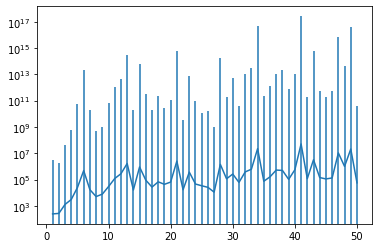

In [16]:
x = list(range(1,51))
plt.errorbar(x, means, variances)
plt.yscale('log')
#plt.plot(means)
#plt.yscale('log')

Podemos ver un comportamiento bastante errático aunque se ha modificado el número de muestras correspondientes a cada dinero inicial a 100. De todas formas, parece que, en media, tenemos un crecimiento exponencial del número de partidas jugadas antes de arruinarse.

De igual manera, la varianza también parece aumentar en función del dinero inicial.

### Ejercicio 2

<div style="color: #5D8AA8;">
Indicar cuales de las siguientes matrices, si usadas como dinamica de un sistema a tiempodiscreto son:

* Estable (todos los autovalores $\lambda$ tienen $|\lambda|<1$)
* Inestable (hay por lo menos un autovalor $\lambda$ con $|\lambda|>1$)
* Marginal (hay por lo menos un autovalor $\lambda$ con $|\lambda|=1$ y los demas tienen $|\lambda|<1$)
* Oscilantes (hay por lo menos un autovalor $\lambda$ con $|\lambda|=-1$ y los demas tienen $|\lambda|<1$)

Indicar los autovalores y los autovectores correspondientes a las componentes estables, inestables, marginales y oscilantes
</div>

In [76]:
A = np.array([[0.175, 0.125, 0.725, -0.225],
              [0.125, 0.175, -0.225, 0.725],
              [0.725, -0.225, 0.175, 0.125],
              [-0.225, 0.725, 0.125, 0.175]])
np.linalg.eig(A)

(array([-0.9, -0.2,  1. ,  0.8]),
 array([[-0.5,  0.5,  0.5,  0.5],
        [ 0.5,  0.5, -0.5,  0.5],
        [ 0.5, -0.5,  0.5,  0.5],
        [-0.5, -0.5, -0.5,  0.5]]))

Podemos ver que la matriz A es marginal, es decir, tiene un autovalor $\lambda = 1$ con autovector asociado $(0.5, -0.5, 0.5, -0.5)$. Los demás autovalores tienen módulo menor que 1 y por tanto son parte de una componente estable.

In [77]:
B = np.array([[0.30, -0.30, 0.95, -0.45],
              [-0.30, 0.30, -0.45, 0.95],
              [0.95, -0.45, 0.30, -0.30],
              [-0.45, 0.95, -0.30, 0.30]])
np.linalg.eig(B)

(array([ 2. ,  0.5, -0.8, -0.5]),
 array([[ 0.5, -0.5, -0.5, -0.5],
        [-0.5, -0.5,  0.5, -0.5],
        [ 0.5, -0.5,  0.5,  0.5],
        [-0.5, -0.5, -0.5,  0.5]]))

La matriz B es inestable ya que presenta un autovalor $\lambda = 2$ con autovector asociado $(0.5, -0.5, 0.5 ,-0.5)$. El resto de autovalores tienen módulo menor que 1 y por tanto forman una componente estable.

In [78]:
C = np.array([[0.05, -0.05, 0.70, -0.20],
              [-0.05, 0.05, -0.20, 0.70],
              [0.70, -0.20, 0.05, -0.05],
              [-0.20, 0.70, -0.05, 0.05]])
np.linalg.eig(C)

(array([ 1. ,  0.5, -0.8, -0.5]),
 array([[ 0.5, -0.5, -0.5, -0.5],
        [-0.5, -0.5,  0.5, -0.5],
        [ 0.5, -0.5,  0.5,  0.5],
        [-0.5, -0.5, -0.5,  0.5]]))

La matriz C es marginal, es decir, tiene un autovalor $\lambda = 1$ con autovector asociado $(0.5, -0.5, 0.5, -0.5)$. Los demás autovalores tienen módulo menor que 1 y por tanto son parte de una componente estable.

In [79]:
D = np.array([[-0.125, -0.125, 0.775, -0.025],
              [-0.125, -0.125, -0.025, 0.775],
              [0.775, -0.025, -0.125, -0.125],
              [-0.025, 0.775, -0.125, -0.125]])
np.linalg.eig(D)

(array([ 0.8,  0.5, -1. , -0.8]),
 array([[ 0.5, -0.5, -0.5,  0.5],
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.5, -0.5,  0.5, -0.5],
        [-0.5, -0.5,  0.5,  0.5]]))

La matriz D es oscilante por presentar un autovalor $\lambda = -1$ con autovector asociado $(-0.5, -0.5, 0.5, 0.5)$. El resto de autovalores tienen módulo menor que 1 y por tanto corresponden con una componente estable. 

### Ejercicio 3

<div style="color: #5D8AA8;">
    Considerando el sistema dinamico    
    \[x_{t+1} = Ax_t + Bu_t + w_t\\
    z_t = Cx_t + v_t\]
    $w$ es un ruido gaussiano con media cero y desviación estándar igual a $10$, $v$ es un ruido gaussiano con media cero y desviación estándar definida a continuación. <br>
    Crear un filtro de Kalman para estimar el estado de este sistema y hacer un gráfico del error
    \[\sum^t_{k=1}\left(\hat{x}_{t,k} - x_{t,k}\right)^2\]
    por $t=1,\dots,100$ en los dos casos en que la desviación estándar de $v_t$ sea $1.0$ 0 $10.0$.
</div>

In [2]:
def CWSE(X1, X2):
    return np.array([(x1-x2)**2 for x1,x2 in zip(X1,X2)]).sum()

In [80]:
def generate_one_step(x, A, B, C, u, v, w):
    x = A@x + B*u + w
    z = C@x + v
    return x, z

def v(variance_v):
    return np.array([[gauss(0, sqrt(variance_v))] for _ in range(2)])

def w(variance_w):
    return np.array([[gauss(0, sqrt(variance_w))] for _ in range(4)])

def u():
    return 1

def generate_x(A, B, C, variance_w, variance_v, time):
    # First observation
    x = [np.array([[uniform(0,1)] for _ in range(4)])]
    z = [C@x[0] + v(variance_v)]
    # Get <time> observations following the system
    for t in range(time):
        _x, _z = generate_one_step(x[t], A, B, C, u(), v(variance_v), w(variance_w))
        x.append(_x)
        z.append(_z)
    return x, z

def Kalman_one_step(x, z, A, B, C, P, R, Q):
    # Compute Kalman Gain
    K = P@(C.transpose())@(np.linalg.inv(C@P@(C.transpose()) + R))
    # Update the estimate
    x = x + K@(z - C@x)
    # Update Covariance
    P = (np.eye(4)-K@C)@P
    # Compute the priors
    x = A@x + B*u()
    P = A@P@(A.transpose()) + Q
    return x, P

def Kalman(x, z, A, B, C, variance_w, variance_v, time):
    # Define matrixes
    Q = np.eye(4)*variance_w
    R = np.eye(2)*variance_v
    P = np.eye(4)
    # Get <time> observations executing one Kalman step at a time
    for t in range(time):
        _x, P = Kalman_one_step(x[t], z[t], A, B, C, P, R, Q)
        x.append(_x)
    return x

Comenzamos con un valor de la varianza para v de 1

In [81]:
variance_w = 100.0
variance_v = 1.0

A = np.array([[0.150, 0.150, 0.700, -0.200],
              [0.150, 0.150, -0.200, 0.700],
              [0.700, -0.200, 0.150, 0.150],
              [-0.200, 0.700, 0.150, 0.150]])

B = np.array([[1.0],
              [1.0],
              [1.0],
              [1.0]])

C = np.array([[1.0,0.0,0.0,0.0],
              [0.0,1.0,0.0,0.0]])

In [83]:
x,z = generate_x(A,B,C, variance_w, variance_v, 100)
x_k = Kalman([x[0]], z, A, B, C, variance_w, variance_v, 100)

In [84]:
errors = [CWSE(real, kal) for real, kal in zip(x, x_k)]
np.array(errors).mean()

465.06119161578164

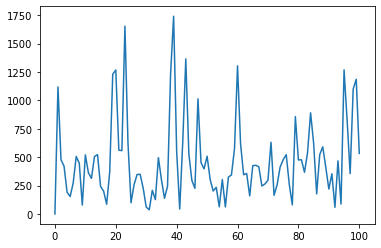

In [85]:
plt.plot(errors)

Ahora pasamos a coger un valor de la varianza para v de 100

In [86]:
variance_w = 100.0
variance_v = 100.0

A = np.array([[0.150, 0.150, 0.700, -0.200],
              [0.150, 0.150, -0.200, 0.700],
              [0.700, -0.200, 0.150, 0.150],
              [-0.200, 0.700, 0.150, 0.150]])

B = np.array([[1.0],
              [1.0],
              [1.0],
              [1.0]])

C = np.array([[1.0,0.0,0.0,0.0],
              [0.0,1.0,0.0,0.0]])

In [90]:
x,z = generate_x(A,B,C, variance_w, variance_v, 100)
x_k = Kalman([x[0]], z, A, B, C, variance_w, variance_v, 100)

In [91]:
errors = [CWSE(real, kal) for real, kal in zip(x, x_k)]

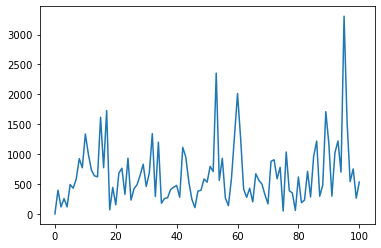

In [92]:
plt.plot(errors)

Podemos ver que el error es mayor cuando la varianza de v es 100. Esto parece indicarnos que el filtro de Kalman no es capaz de modelar correctamente el ruido que se induce en el sistema.